# Vaje 5: Metoda podpornih vektorjev

## Naloga 1: Linearno jedro in parameter C (cena)

1.a: Pripravi umetne, linearno ločljive podatke z dvema napovednima spremenljivkama. Množica podatkov naj vsebuje 1000 točk in naj bo mešanica dveh normalnih porazdelitev; ene s centrom v -2 in druge s centrom v 2. Ciljna spremenljivka naj bo dvojiška, njeni vrednosti pa naj sovpadata z obema porazdelitvama. 

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
np.random.seed(42)

xCoord = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 500)])
yCoord = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 500)])
X = np.column_stack([xCoord, yCoord])
y = np.concatenate([np.zeros(500), np.ones(500)])

print(X)

[[-1.50328585 -0.60064456]
 [-2.1382643  -1.07536632]
 [-1.35231146 -1.94036963]
 ...
 [ 2.64084286  1.11812535]
 [ 1.42882101  1.83693304]
 [ 2.57258278  1.25509736]]


1.b: Podatke vizualiziraj s pomočjo metode `matplotlib.pyplot.scatter`. So podatki res linearno ločljivi?

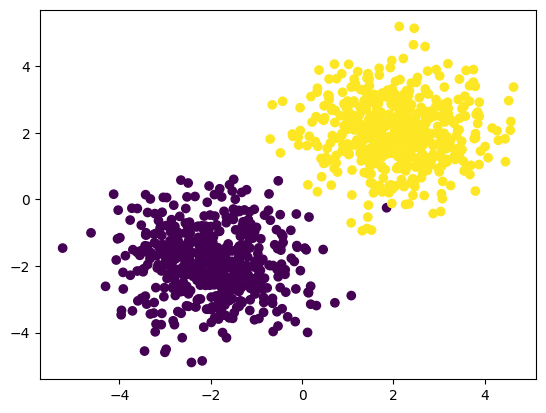

In [19]:
# Visualize data

plt.scatter(x=xCoord, y=yCoord, c=y)

1.c: Natreniraj model podpornih vektorje z linearnim jedrom in oceni njegovo točnost.

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [modelom sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
   
</details>

In [20]:
from sklearn.svm import SVC 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

np.random.seed(42)

# Create a support vector classifier
svc = SVC(kernel='linear')

# Train model and asses its accuracy with KFold
kf = KFold(n_splits=5, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc.fit(X_train, y_train)
    print(f'Fold {i} - Accuracy: {accuracy_score(y_test, svc.predict(X_test))}')




Fold 0 - Accuracy: 0.995
Fold 1 - Accuracy: 1.0
Fold 2 - Accuracy: 1.0
Fold 3 - Accuracy: 1.0
Fold 4 - Accuracy: 0.995


1.d: Natreniraj model podpornih vektorjev na vseh podatkih in vizualiziraj odločitveno krivuljo s pomočjo metode `vizualize_decision_boundery`. Je model uspel podatke pravilno ločiti.

In [21]:
def vizualize_decision_boundery(model, X, y):
    h = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

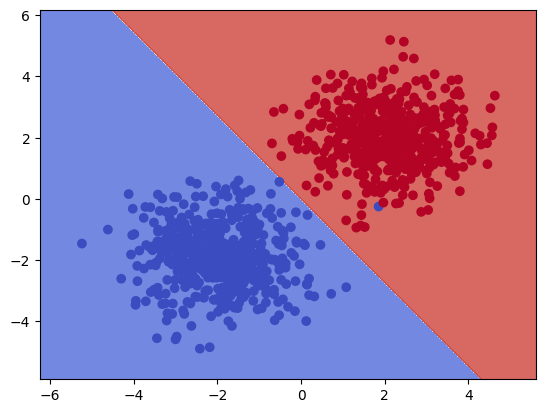

In [22]:
svc.fit(X, y)
vizualize_decision_boundery(svc, X, y)

1.e: Podatkovni množici dodaj 50 točk, ki bodo vzorčeni iz normalne porazdelitve s centrom v [-10, 2]. Ciljna vrednost novih točk naj sovpada s ciljno vrednostjo točk iz porazdelitve s centrom v 2. 

In [23]:
np.random.seed(42)

extraX = np.column_stack([np.random.normal(-10, 1, 50), np.random.normal(2, 1, 50)])
extraY = np.ones(50)
X = np.concatenate([X, extraX])
y = np.concatenate([y, extraY])
print(X.shape, y.shape)

(1050, 2) (1050,)


1.f: Preveri točnost modela podpornih vektorjev za različno vrednost parametra C.

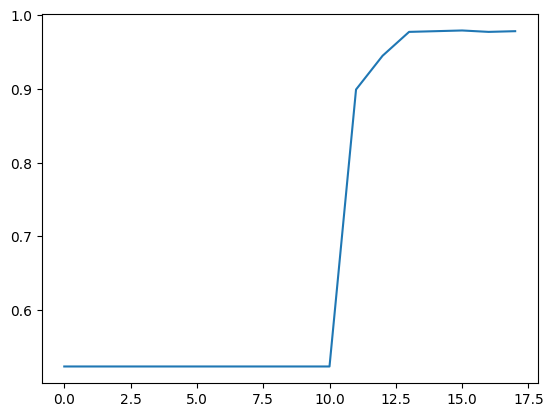

In [40]:
# Train model and asses its accuracy with KFold for different c values
kf = KFold(n_splits=5, shuffle=True)
accuracy = []

for c in range(15, -3, -1):
    svc = SVC(kernel='linear', C=10**(-c))
    accCScore = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc.fit(X_train, y_train)
        accCScore.append(accuracy_score(y_test, svc.predict(X_test)))
    accuracy.append(np.mean(accCScore))

# Visualize the accuracy for different c values
plt.plot(range(0, 18), accuracy)
        

1.g: Vizualiziraj odločitveno krivuljo za različne vrednosti parametra C. Se krivulja spremeni med različnimi vrednostmi. Če se, kakšna je ta sprememba?

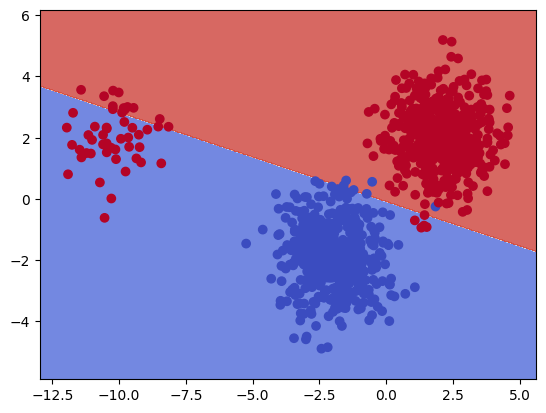

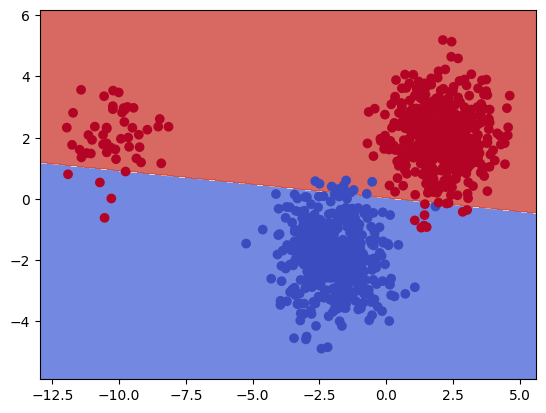

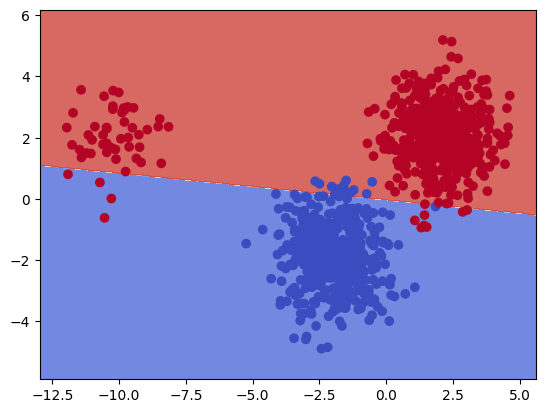

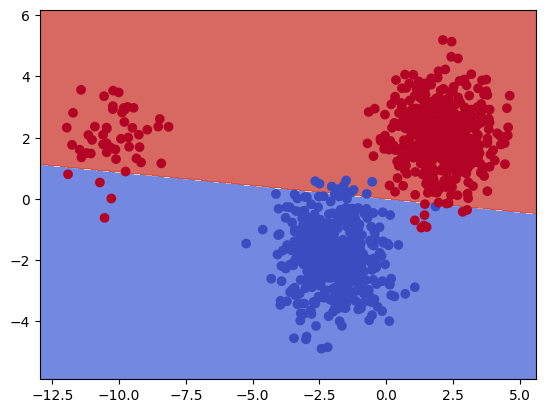

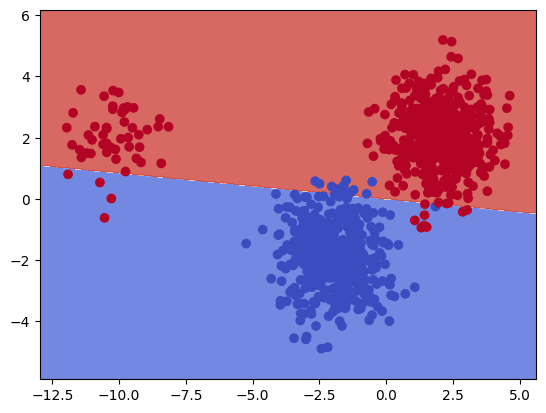

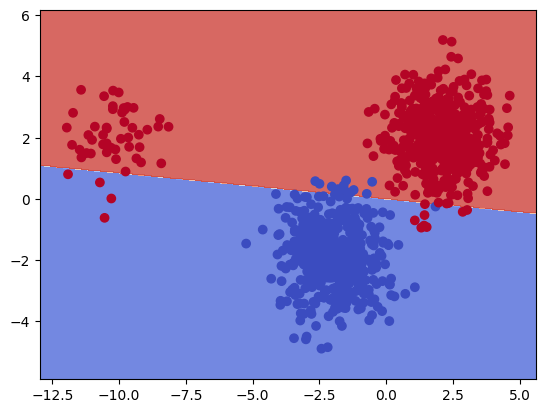

In [42]:
for c in range(-3, 3):
    svc = SVC(kernel='linear', C=10**c)
    svc.fit(X, y)
    vizualize_decision_boundery(svc, X, y)

## Naloga 2: Različna jedra

2.a: Poglejmo primer podatkov, ki niso ločljivi linearno. Sestavi podatkovno množico, kjer bodo podatki razdeljeni v dva koncentrična kroga. Radij naj bo vzorčen iz mešanice dveh normalinih porazdelitev s centri v 2 in 4, ter standardno deviacijo 0.3, kot pa naj bo porazdeljen enakomerno med 0 in dva pi. Podatke tudi vizualiziraj.

<details>
  <summary>Namig:</summary>
  *Podatke o radiju in kotu ne pozabi pretvoriti v evklidski koordinatni sistem.*
</details>

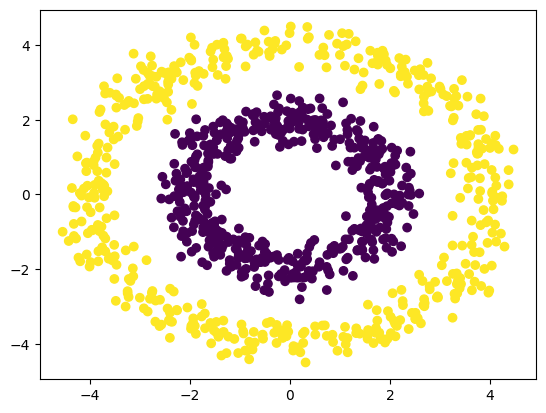

In [46]:
np.random.seed(42)

theta = np.random.uniform(0, 2*np.pi, 1000)
radium = np.concatenate([np.random.normal(2, 0.3, 500), np.random.normal(4, 0.3, 500)])
y = np.concatenate([np.zeros(500), np.ones(500)])

# Pretvorba v evklicdski koordinatni sistem
xCoord = radium * np.cos(theta)
yCoord = radium * np.sin(theta)

X = np.column_stack([xCoord, yCoord])

# Visualize data
plt.scatter(x=xCoord, y=yCoord, c=y)


2.b: Preveri točnost modela podpornih vektorjev z linearnim jedrom in vizualiziraj odločitveno krivuljo. Je uporaba tega jedra primerna za dane podatke?

Fold 0 - Accuracy: 0.48
Fold 1 - Accuracy: 0.44
Fold 2 - Accuracy: 0.47
Fold 3 - Accuracy: 0.425
Fold 4 - Accuracy: 0.51


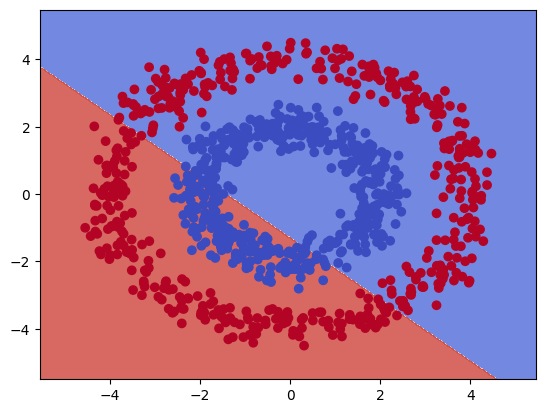

In [48]:
np.random.seed(42)

# Create a support vector classifier
svc = SVC(kernel='linear')

# Train model and asses its accuracy with KFold
kf = KFold(n_splits=5, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc.fit(X_train, y_train)
    print(f'Fold {i} - Accuracy: {accuracy_score(y_test, svc.predict(X_test))}')

# Vidualize svd accuracy
svc.fit(X, y)
vizualize_decision_boundery(svc, X, y)

2.c: Preveri točnost modela podpornih vektorjev s polinomskim jedrom različnih stopenj (npr. 1-5). Za vsako vizualiziraj odločitveno krivuljo. Je uporaba tega jedra bolj primerna za dane podatke? Katere stopnje delujejo boljse in katere slabše?

Accurac polynomial core degree 1: 0.465
Accurac polynomial core degree 2: 1.0
Accurac polynomial core degree 3: 0.6530000000000001
Accurac polynomial core degree 4: 1.0
Accurac polynomial core degree 5: 0.623


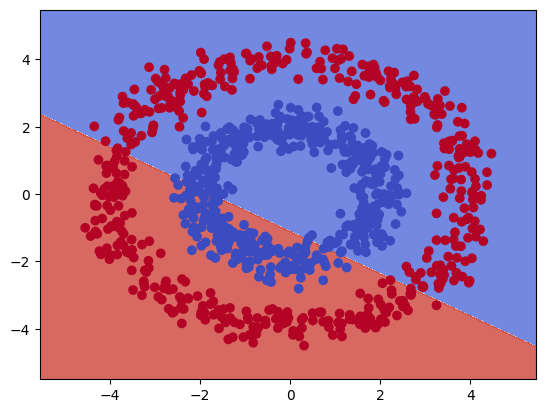

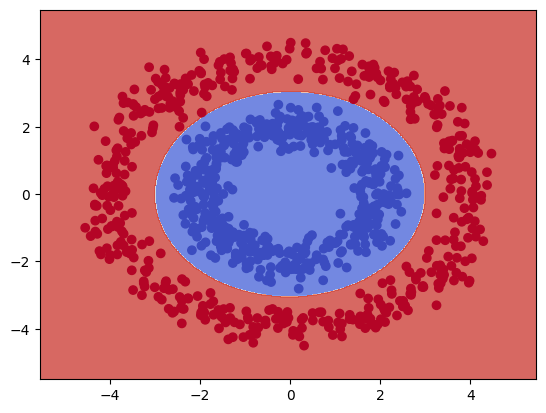

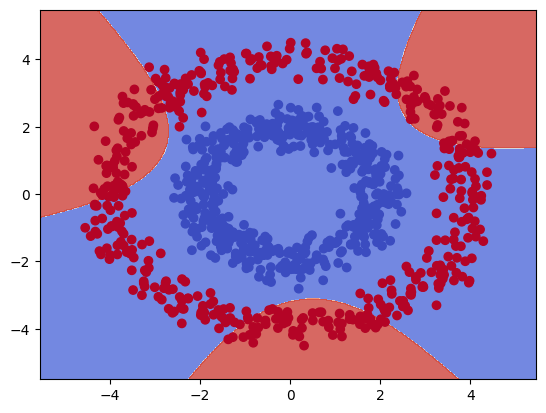

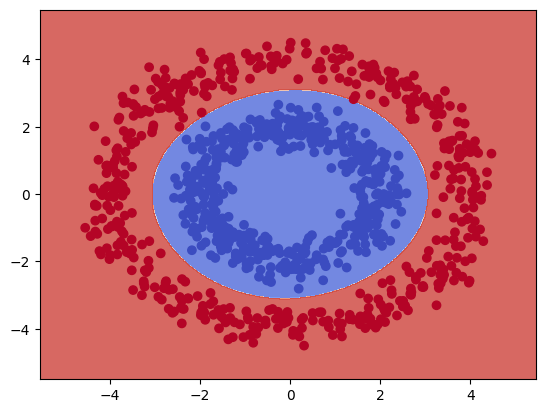

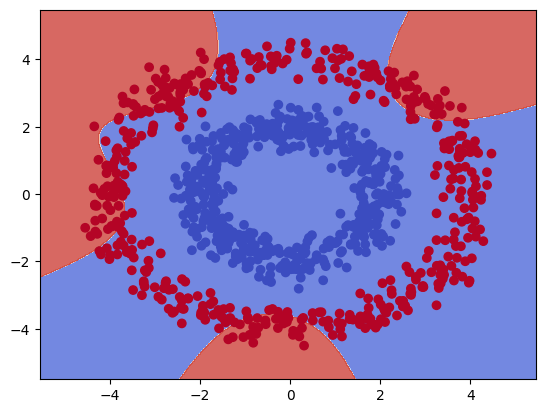

In [52]:
# Train svc with polynomial core and asses its accuracy with KFold for different c values
np.random.seed(42)

kf = KFold(n_splits=5, shuffle=True)
accuracy = []
for d in range(1, 6):
    svc = SVC(kernel='poly', degree=d)
    accCScore = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc.fit(X_train, y_train)
        accCScore.append(accuracy_score(y_test, svc.predict(X_test)))
    accuracy.append(np.mean(accCScore))

for i, acc in enumerate(accuracy):
    print(f'Accurac polynomial core degree {i+1}: {acc}')


# Visualize the accuracy for different c values
for d in range(1, 6):
    svc = SVC(kernel='poly', degree=d)
    svc.fit(X, y)
    vizualize_decision_boundery(svc, X, y)

2.d: Preveri še točnost modela, ki ima jedrom iz radialnih baznih funkcij ("rbf" v paketu sklearn).

Fold 0 - Accuracy: 1.0
Fold 1 - Accuracy: 1.0
Fold 2 - Accuracy: 1.0
Fold 3 - Accuracy: 1.0
Fold 4 - Accuracy: 1.0


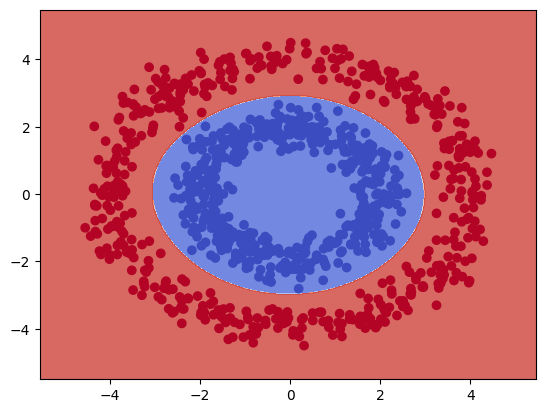

In [51]:
np.random.seed(42)

# Create a support vector classifier
svc = SVC(kernel='rbf')

# Train model and asses its accuracy with KFold
kf = KFold(n_splits=5, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc.fit(X_train, y_train)
    print(f'Fold {i} - Accuracy: {accuracy_score(y_test, svc.predict(X_test))}')

#Visualise model
svc.fit(X, y)
vizualize_decision_boundery(svc, X, y)


2.e: Pripravi novo podatkovno množico, v kateri podatki prihajajo iz istih distribucij, a s standardno deviacijo 2.

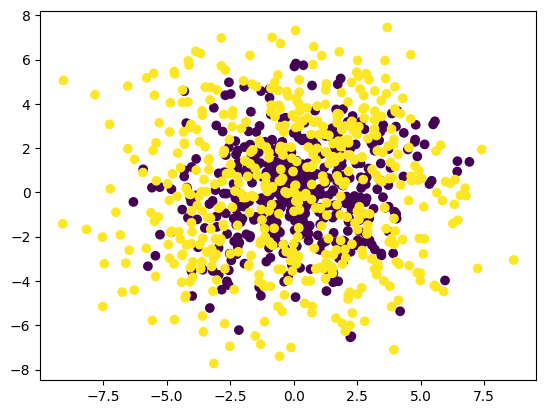

In [53]:
np.random.seed(42)

theta = np.random.uniform(0, 2*np.pi, 1000)
radium = np.concatenate([np.random.normal(2, 2, 500), np.random.normal(4, 2, 500)])
y = np.concatenate([np.zeros(500), np.ones(500)])

# Pretvorba v evklicdski koordinatni sistem
xCoord = radium * np.cos(theta)
yCoord = radium * np.sin(theta)

X = np.column_stack([xCoord, yCoord])

# Visualize data
plt.scatter(x=xCoord, y=yCoord, c=y)


2.f: Na novih podatkih poišči najboljši SVM model. Preizkusi različna jedra in vrednosti parametra C

In [55]:
# Search for the best svc model
np.random.seed(42)

cores = ['linear', 'poly', 'rbf']
kf = KFold(n_splits=5, shuffle=True)
accuracy = {"linear":[], "poly":[], "rbf":[]}

for core in cores:
    svc = SVC(kernel=core)
    accKScore = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc.fit(X_train, y_train)
        accKScore.append(accuracy_score(y_test, svc.predict(X_test)))
    accuracy[core].append(np.mean(accKScore))

print(accuracy)

# Ali bo radialni, ali polinomski sode stopnje
# Poglejmo razlicne vrednosti C pri rbf metodi

for c in range(-6, 7):
    svc = SVC(kernel='rbf', C=5**c)
    scores = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, svc.predict(X_test)))
    print(f'C: {5**c} - Accuracy: {np.mean(scores)}')




{'linear': [0.525], 'poly': [0.514], 'rbf': [0.6839999999999999]}
C: 6.4e-05 - Accuracy: 0.46799999999999997
C: 0.00032 - Accuracy: 0.48
C: 0.0016 - Accuracy: 0.47000000000000003
C: 0.008 - Accuracy: 0.521
C: 0.04 - Accuracy: 0.697
C: 0.2 - Accuracy: 0.688
C: 1 - Accuracy: 0.6900000000000001
C: 5 - Accuracy: 0.679
C: 25 - Accuracy: 0.6819999999999999
C: 125 - Accuracy: 0.6699999999999999
C: 625 - Accuracy: 0.6699999999999999
C: 3125 - Accuracy: 0.6719999999999999
C: 15625 - Accuracy: 0.6719999999999999


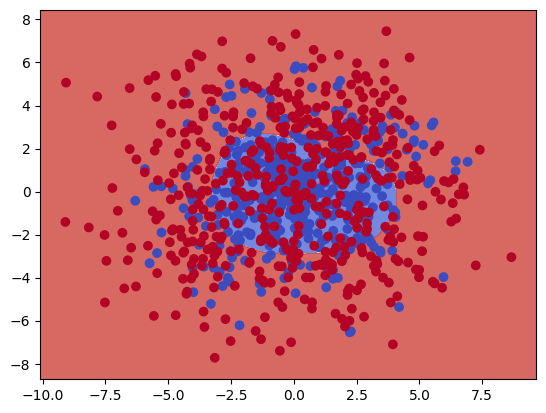

In [56]:
# Zgleda da je najboljši model rbf z C okoli 1 tako da poglejmo vizualizacijo
svc = SVC(kernel='rbf', C=1)
svc.fit(X, y)
vizualize_decision_boundery(svc, X, y)

